# **Estatística qui-quadrado (𝝌²)**

O objetivo é avaliar se existe relação entre as variáveis qualitativas ou categóricas estudadas, além do grau de associação entre elas. Isto pode ser feito por meio de tabelas de distribuições de frequências, medidas-resumo como a estatística qui-quadrado (𝝌²) que mede a discrepância entre uma tabela de contingência observada e uma tabela  de contingência esperada, partindo da hipótese de que não há associação entre as variáveis estudadas. Se a distribuição de frequências observadas for exatamente igual à distribuição de frequências esperadas, o resultado da estatística qui-quadrado é zero. Assim, um valor baixo de 𝝌² indica independência entre as variáveis.
A equação é dada por:

<img src='https://tse4.mm.bing.net/th?id=OIP.l74WKAxpqYmhDmWUDqXYjQAAAA&pid=Api&P=0&h=180'></img>

em que:
1. Oij:: são quantidade de observações na i-ésima categoria da variável X e na j-ésima categoria da variável Y
2. Eij:: frequência esperada de observações na i-ésima categoria da variável X e na j-ésima categoria da variável Y</p>
3. I: quantidade de categorias (linhas) da variável X;
3. J: quantidade de categorias (colunas) da variável Y.</p>


In [9]:
# importando bibliotecas
import pandas as pd
import numpy as np
import random
import scipy.stats as stats

import matplotlib.pyplot as plt

## **Resolução de case teórico**
Aqui serão apresentados o passo-a-passo por trás do teste qui-quadrado de duas variáveis qualitativas para entendermos qual a relação entre as variáveis.

##### **Criando dataset fictício para exemplo de estudo**

A base de dados terá 200 amostras de avaliações de satisfação de pessoas com os planos de saúde "Total Health", "Viva Vida" e "Mena Saúde". As avaliações estão dispostas entre os níveis "Baixo", "Médio" e "Alto".

In [10]:
# Nomes dos planos de saúde e níveis de satisfação
planos = ['Total Health', 'Viva Vida', 'Mena Saúde']
satisfacao = ['Alto', 'Médio', 'Baixo']

# Lista para armazenar os dados
dados = []

# numero de amostras
n = 200

# Gerando 200 amostras aleatórias
for _ in range(n):
    plano = random.choice(planos)
    nivel_satisfacao = random.choice(satisfacao)
    dados.append([plano, nivel_satisfacao])

# Crie um DataFrame com os dados
df = pd.DataFrame(dados, columns=['plano', 'nivel_satisfacao'])

# Exiba as primeiras linhas do DataFrame
df.head()

,plano,nivel_satisfacao
0,Mena Saúde,Médio
1,Viva Vida,Alto
2,Total Health,Alto
3,Mena Saúde,Alto
4,Viva Vida,Baixo


## **Passo 1 - tabela de distribuição conjunta de frequências**

A forma mais simples de resumir um conjunto de dados provenientes de duas variáveis qualitativas é por meio de uma tabela de distribuição conjunta de frequências, neste caso específico denominada tabela de contingência ou tabela de classificação cruzada (cross-tabulation) ou, ainda, tabela de correspondência que exibe, de forma conjunta, as frequências absolutas ou relativas das categorias da variável X, representada no eixo das abscissas, e da variável Y, representada no eixo das ordenadas.

In [11]:
tabela_dcf = df.pivot_table(index='plano', columns='nivel_satisfacao', aggfunc='size', fill_value=0)
tabela_dcf = tabela_dcf.reindex(index=['Total Health', 'Viva Vida', 'Mena Saúde'], columns=['Baixo', 'Médio', 'Alto'])
tabela_dcf.head()

nivel_satisfacao,Baixo,Médio,Alto
plano,,,
Total Health,17,22,18
Viva Vida,26,22,20
Mena Saúde,15,37,23


## **Passo 2 - Frequência absoluta esperada**

A distribuição conjunta de frequências relativas em relação ao total de cada linha e a distribuição conjunta de frequências relativas em relação ao total de cad coluna.

In [12]:
freq_plano = df.plano.value_counts()
freq_ns = df.nivel_satisfacao.value_counts()

freq_esperada = pd.DataFrame(index=freq_plano.index, columns=freq_ns.index)

for plano in freq_plano.index:
    for satisfacao in freq_ns.index:
        probabilidade_conjunta = (freq_plano[plano] * freq_ns[satisfacao])/n
        freq_esperada.at[plano, satisfacao] = probabilidade_conjunta

tabela_fe = freq_esperada.reindex(index=['Total Health', 'Viva Vida', 'Mena Saúde'], columns=['Baixo', 'Médio', 'Alto'])
tabela_fe.head()

,Baixo,Médio,Alto
Total Health,16.53,23.085,17.385
Viva Vida,19.72,27.54,20.74
Mena Saúde,21.75,30.375,22.875


## **Passo 3 - Resíduo**

resíduos são a subtração das frequências relativas absolutas pelas frequências absoluta esperadas.

In [13]:
residuo = tabela_dcf - tabela_fe
residuo.head()

nivel_satisfacao,Baixo,Médio,Alto
plano,,,
Total Health,0.47,-1.085,0.615
Viva Vida,6.28,-5.54,-0.74
Mena Saúde,-6.75,6.625,0.125


## **Passo 4 - 𝝌² (qui-quadrado)**

Por fim, a estatística 𝝌² é dada pelo quadrado do resíduo sobre a frequência absoluta esperada.


In [14]:
X2 = ((residuo**2)/tabela_fe).values.sum()
print(f'valor de 𝝌²: {X2:.2f}')

valor de 𝝌²: 6.77


Para analisármos o tipo de relação das duas variáveis, precisamos realizar um teste de hipóteses. Onde:

1. Ho = as variáveis não são associadas
2. H1 = as variáveis são associadas significativamente

## **Passo 5 - Teste de Hipótese**

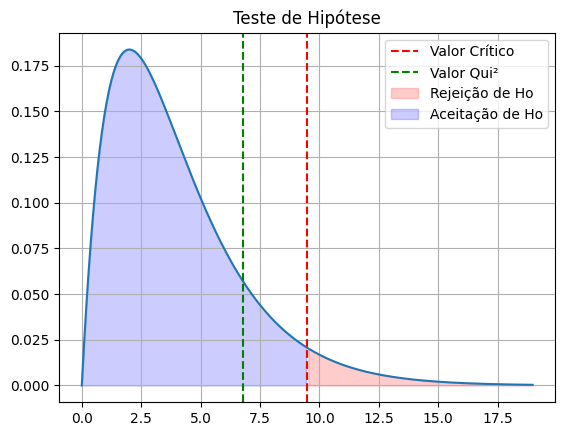

In [19]:
# realizando teste de hipóteses
alpha = 0.05
graus_de_liberdade = int((len(df.nivel_satisfacao.value_counts().index)-1) + (len(df.plano.value_counts().index)-1))
valor_critico = stats.chi2.ppf(1 - alpha, graus_de_liberdade) # tabela

x = np.linspace(0, 2 * valor_critico, n)
y = stats.chi2.pdf(x, graus_de_liberdade) #distribuição qui-quadrado

plt.plot(x, y)
plt.axvline(x=valor_critico, color='red', linestyle='--', label=f'Valor Crítico')
plt.axvline(x=X2, color='green', linestyle='--', label=f'Valor Qui²')
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.2, label='Rejeição de Ho')
plt.fill_between(x, 0, y, where=(x <= valor_critico), color='blue', alpha=0.2, label='Aceitação de Ho')


plt.title(f'Teste de Hipótese')
plt.legend()
plt.grid(True)
plt.show()